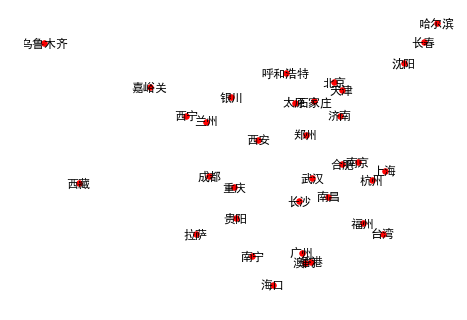

In [11]:
#####################Search Problem

coordination_source = """
{name:'ÂÖ∞Â∑û', geoCoord:[103.73, 36.03]},
{name:'ÂòâÂ≥™ÂÖ≥', geoCoord:[98.17, 39.47]},
{name:'Ë•øÂÆÅ', geoCoord:[101.74, 36.56]},
{name:'ÊàêÈÉΩ', geoCoord:[104.06, 30.67]},
{name:'Áü≥ÂÆ∂Â∫Ñ', geoCoord:[114.48, 38.03]},
{name:'ÊãâËê®', geoCoord:[102.73, 25.04]},
{name:'Ë¥µÈò≥', geoCoord:[106.71, 26.57]},
{name:'Ê≠¶Ê±â', geoCoord:[114.31, 30.52]},
{name:'ÈÉëÂ∑û', geoCoord:[113.65, 34.76]},
{name:'ÊµéÂçó', geoCoord:[117, 36.65]},
{name:'Âçó‰∫¨', geoCoord:[118.78, 32.04]},
{name:'ÂêàËÇ•', geoCoord:[117.27, 31.86]},
{name:'Êù≠Â∑û', geoCoord:[120.19, 30.26]},
{name:'ÂçóÊòå', geoCoord:[115.89, 28.68]},
{name:'Á¶èÂ∑û', geoCoord:[119.3, 26.08]},
{name:'ÂπøÂ∑û', geoCoord:[113.23, 23.16]},
{name:'ÈïøÊ≤ô', geoCoord:[113, 28.21]},
{name:'Êµ∑Âè£', geoCoord:[110.35, 20.02]},
{name:'Ê≤àÈò≥', geoCoord:[123.38, 41.8]},
{name:'ÈïøÊò•', geoCoord:[125.35, 43.88]},
{name:'ÂìàÂ∞îÊª®', geoCoord:[126.63, 45.75]},
{name:'Â§™Âéü', geoCoord:[112.53, 37.87]},
{name:'Ë•øÂÆâ', geoCoord:[108.95, 34.27]},
//{name:'Âè∞Êπæ', geoCoord:[121.30, 25.03]},
{name:'Âåó‰∫¨', geoCoord:[116.46, 39.92]},
{name:'‰∏äÊµ∑', geoCoord:[121.48, 31.22]},
{name:'ÈáçÂ∫Ü', geoCoord:[106.54, 29.59]},
{name:'Â§©Ê¥•', geoCoord:[117.2, 39.13]},
{name:'ÂëºÂíåÊµ©Áâπ', geoCoord:[111.65, 40.82]},
{name:'ÂçóÂÆÅ', geoCoord:[108.33, 22.84]},
//{name:'Ë•øËóè', geoCoord:[91.11, 29.97]},
{name:'Èì∂Â∑ù', geoCoord:[106.27, 38.47]},
{name:'‰πåÈ≤ÅÊú®ÈΩê', geoCoord:[87.68, 43.77]},
{name:'È¶ôÊ∏Ø', geoCoord:[114.17, 22.28]},
{name:'Êæ≥Èó®', geoCoord:[113.54, 22.19]}
"""

########################Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ
##Â≠óÁ¨¶‰∏≤ÂèòÊàêÂ≠óÂÖ∏
import re
import math
from collections import defaultdict
import matplotlib

coordinatioon_dict={}
coordination_source_list = re.findall("name:'(\w+)', geoCoord:\[(\d+\.*\d+), (\d+\.*\d+)\]",coordination_source)
for l in coordination_source_list:
    city, long, lat = l
    coordinatioon_dict[city]=(float(long),float(lat))
coordinatioon_dict

##ËÆ°ÁÆó‰∏§‰∏™ÂüéÂ∏Ç‰πãÈó¥ÁöÑË∑ùÁ¶ª
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def get_geo_distance(city1, city2):
    return geo_distance(coordinatioon_dict[city1], coordinatioon_dict[city2])

get_geo_distance('‰∏äÊµ∑', 'Êù≠Â∑û')


##ÁªòÂà∂ÁΩëÁªúÂõæ
import networkx as nx
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'
city_graph = nx.Graph()
city_graph.add_nodes_from(list( coordinatioon_dict.keys()))
nx.draw(city_graph,coordinatioon_dict, with_labels=True, node_size=30)




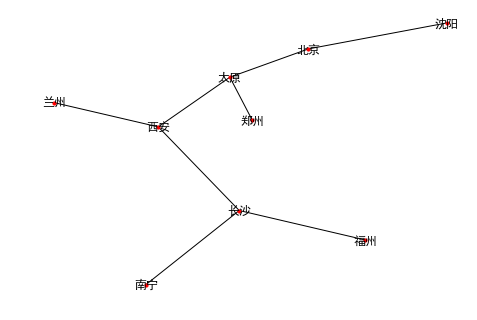

In [12]:
##
simple_connection_info_src = {
    'Âåó‰∫¨': ['Â§™Âéü', 'Ê≤àÈò≥'],
    'Â§™Âéü': ['Âåó‰∫¨', 'Ë•øÂÆâ', 'ÈÉëÂ∑û'],
    'ÂÖ∞Â∑û': ['Ë•øÂÆâ'],
    'ÈÉëÂ∑û': ['Â§™Âéü'],
    'Ë•øÂÆâ': ['ÂÖ∞Â∑û', 'ÈïøÊ≤ô'],
    'ÈïøÊ≤ô': ['Á¶èÂ∑û', 'ÂçóÂÆÅ'],
    'Ê≤àÈò≥': ['Âåó‰∫¨']
}

simple_connection_info = defaultdict(list)
simple_connection_info.update(simple_connection_info_src)
nx.draw(nx.Graph(simple_connection_info),coordinatioon_dict , with_labels=True, node_size=10)

In [36]:
#############ÂÆö‰πâÊêúÁ¥¢ÂáΩÊï∞ÔºåÂü∫‰∫éÂπøÂ∫¶‰ºòÂÖàÈÅçÂéÜÔºàBreath First Search)ÊñπÊ≥ï
def search(start, destination, connection_grpah):
    pathes = [[start]]##Â≠òÂÇ®ÊâÄÊúâÊé¢Á¥¢Âá∫Êù•ÁöÑË∑ØÂæÑÔºåÊØè‰∏™ÂÖÉÁ¥†‰∏∫‰∏ÄÊù°Ë∑ØÂæÑÔºåÊï∞ÊçÆÂΩ¢Âºè‰∏∫ÂàóË°®„ÄÇÂ¶Ç[[ÂÖ∞Â∑ûÔºåË•øÂÆâÔºåÈïøÊ≤ôÔºåÁ¶èÂ∑û],[ÂÖ∞Â∑ûÔºåË•øÂÆâÔºåÂ§™Âéü]Ôºå[ÂÖ∞Â∑ûÔºåË•øÂÆâÔºåÂ§™ÂéüÔºåÈÉëÂ∑û]]
    
    visited = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)#popÂáΩÊï∞ÔºåÁßªÈô§ÂàóË°®pathes‰∏≠ÁöÑÁ¨¨0‰∏™ÂÖÉÁ¥†ÔºåÂπ∂‰∏îËøîÂõûË¢´Âà†Èô§ÁöÑÂÖÉÁ¥†
        froninter = path[-1]
        
        if froninter in visited: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        visited.add(froninter)

        
search("ÂÖ∞Â∑û","Á¶èÂ∑û",simple_connection_info)       

['ÂÖ∞Â∑û', 'Ë•øÂÆâ', 'ÈïøÊ≤ô', 'Á¶èÂ∑û']

In [40]:
###ÂÅáËÆæË∑ùÁ¶ªÂ∞è‰∫éthresholdÁöÑÂüéÂ∏Ç‰πãÈó¥ÈÉΩËÉΩÁõ¥ËææÔºåÂàõÂª∫ÁΩëÁªúÂõæ
threshold = 500
city_connection = defaultdict(list)
for c1 in coordinatioon_dict:
    for c2 in coordinatioon_dict:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

city_connection

defaultdict(list,
            {'ÂÖ∞Â∑û': ['Ë•øÂÆÅ',
              'ÊàêÈÉΩ',
              'ÊãâËê®',
              'Ë¥µÈò≥',
              'ÈáçÂ∫Ü',
              'Èì∂Â∑ù',
              'Ë•øÂÆÅ',
              'ÊàêÈÉΩ',
              'ÊãâËê®',
              'Ë¥µÈò≥',
              'ÈáçÂ∫Ü',
              'Èì∂Â∑ù'],
             'Ë•øÂÆÅ': ['ÂÖ∞Â∑û', 'ÂòâÂ≥™ÂÖ≥', 'ÂÖ∞Â∑û', 'ÂòâÂ≥™ÂÖ≥', 'ÊàêÈÉΩ', 'ÊãâËê®', 'ÊàêÈÉΩ', 'ÊãâËê®'],
             'ÊàêÈÉΩ': ['ÂÖ∞Â∑û',
              'Ë•øÂÆÅ',
              'ÂÖ∞Â∑û',
              'Ë•øÂÆÅ',
              'ÊãâËê®',
              'Ë¥µÈò≥',
              'ÈáçÂ∫Ü',
              'Èì∂Â∑ù',
              'ÊãâËê®',
              'Ë¥µÈò≥',
              'ÈáçÂ∫Ü',
              'Èì∂Â∑ù'],
             'ÊãâËê®': ['ÂÖ∞Â∑û',
              'Ë•øÂÆÅ',
              'ÊàêÈÉΩ',
              'ÂÖ∞Â∑û',
              'Ë•øÂÆÅ',
              'ÊàêÈÉΩ',
              'Ë¥µÈò≥',
              'ÈáçÂ∫Ü',
              'Ë¥µÈò≥',
              'ÈáçÂ∫Ü'],
             'Ë¥µÈò≥':

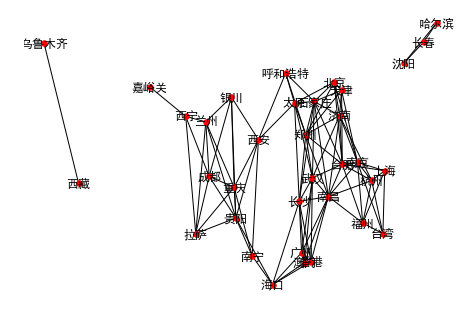

In [41]:
city_with_road = nx.Graph(city_connection)
nx.draw(city_with_road, coordinatioon_dict, with_labels=True, node_size=30)

In [42]:
search("ÂÖ∞Â∑û","Á¶èÂ∑û",city_connection)

['ÂÖ∞Â∑û', 'Ë¥µÈò≥', 'Êµ∑Âè£', 'ÂπøÂ∑û', 'ÂçóÊòå', 'Á¶èÂ∑û']

In [53]:
###############ÂèØÊ∑ªÂä†‰∏çÂêåÁöÑÊêúÁ¥¢Á≠ñÁï•ÔºåÊØîÂ¶ÇÊç¢‰πòÊúÄÂ∞ëÔºåË∑ùÁ¶ªÊúÄÁü≠
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes) # Êàë‰ª¨ÂèØ‰ª•Âä†‰∏Ä‰∏™ÊéíÂ∫èÂáΩÊï∞ ÂØπÊàë‰ª¨ÁöÑÊêúÁ¥¢Á≠ñÁï•ËøõË°åÊéßÂà∂
        

def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(len(path[:-1])):
            distance += get_geo_distance(path[i], path[i+1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)


def pretty_print(cities):
    print('üöó->'.join(cities))
    
pretty_print(search("ÂÖ∞Â∑û","Á¶èÂ∑û",city_connection, sort_candidate=transfer_stations_first))#Êç¢‰πòÊúÄÂ∞ë


ÂÖ∞Â∑ûüöó->Ë¥µÈò≥üöó->Êµ∑Âè£üöó->ÂπøÂ∑ûüöó->ÂçóÊòåüöó->Á¶èÂ∑û


In [49]:
pretty_print(search("ÂÖ∞Â∑û","Á¶èÂ∑û",city_connection, sort_candidate=transfer_as_much_possible))#Êç¢‰πòÊúÄÂ§ö

ÂÖ∞Â∑ûüöó->Ë•øÂÆÅüöó->ÊàêÈÉΩüöó->ÊãâËê®üöó->Ë¥µÈò≥üöó->Êµ∑Âè£üöó->ÂπøÂ∑ûüöó->Ê≠¶Ê±âüöó->Áü≥ÂÆ∂Â∫Ñüöó->ÈÉëÂ∑ûüöó->ÊµéÂçóüöó->Âçó‰∫¨üöó->Á¶èÂ∑û


In [54]:
pretty_print(search("ÂÖ∞Â∑û","Á¶èÂ∑û",city_connection, sort_candidate=shortest_path_first))#ÊúÄÁü≠Ë∑ØÂæÑ

ÂÖ∞Â∑ûüöó->Èì∂Â∑ùüöó->Ë•øÂÆâüöó->Â§™Âéüüöó->ÈÉëÂ∑ûüöó->ÂçóÊòåüöó->Á¶èÂ∑û


In [21]:
#######################„ÄêÈáçË¶ÅÁü•ËØÜÁÇπÔºöÊ∑±Â∫¶‰ºòÂÖàÈÅçÂéÜÂíåÂπøÂ∫¶‰ºòÂÖàÈÅçÂéÜ„Äë
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            #visited = visited + [successor] # Êàë‰ª¨ÊØèÊ¨°Êâ©Â±ïÈÉΩÊâ©Â±ïÊúÄÊñ∞ÂèëÁé∞ÁöÑÁÇπ -> depth first
            visited = [successor] + visited # Êàë‰ª¨ÊØèÊ¨°Êâ©Â±ïÈÉΩÂÖàËÄÉËôëÂ∑≤ÁªèÂèëÁé∞ÁöÑ ËÄÅÁöÑÁÇπ -> breath first
            
            # ÊâÄ‰ª•ËØ¥ÔºåËøô‰∏™Êâ©Â±ïÈ°∫Â∫èÂÖ∂ÂÆûÊòØÂÜ≥ÂÆö‰∫ÜÊàë‰ª¨ÁöÑÊ∑±Â∫¶‰ºòÂÖàËøòÊòØÂπøÂ∫¶‰ºòÂÖà
    
        seen.add(froninter)
    
    return seen

In [26]:
number_graph = defaultdict(list)
number_graph.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})
bfs(number_graph,1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [27]:
def dfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            visited = visited + [successor] # Êàë‰ª¨ÊØèÊ¨°Êâ©Â±ïÈÉΩÊâ©Â±ïÊúÄÊñ∞ÂèëÁé∞ÁöÑÁÇπ -> depth first
            #visited = [successor] + visited # Êàë‰ª¨ÊØèÊ¨°Êâ©Â±ïÈÉΩÂÖàËÄÉËôëÂ∑≤ÁªèÂèëÁé∞ÁöÑ ËÄÅÁöÑÁÇπ -> breath first
            
            # ÊâÄ‰ª•ËØ¥ÔºåËøô‰∏™Êâ©Â±ïÈ°∫Â∫èÂÖ∂ÂÆûÊòØÂÜ≥ÂÆö‰∫ÜÊàë‰ª¨ÁöÑÊ∑±Â∫¶‰ºòÂÖàËøòÊòØÂπøÂ∫¶‰ºòÂÖà
    
        seen.add(froninter)
    
    return seen

dfs(number_graph,1)

2
3
5
7
8
4
6


{1, 2, 3, 4, 5, 6, 7, 8}